# Skin Care Product Recommender System Based on Skin Problem

This project is a *skincare* product recommendation system based on the facial problems experienced.
This dataset was scrapped by me from ecommerce or official websites of the product with details :

| Feature Name | Description |
| --- | --- |
|**product_href** | Product URL link |
|**product_name** | Product name |
|**product_type** |Type of product (Facial wash, Toner, Serum, Moisturizer, Sunscreen) |
|**brand** | Product brand |
|**notable_effects** | What it's good for |
|**skintype** | The suitable type of skin for the product (Normal, Dry, Oily, Combination, Sensitive) |
|**price** | Product price (in IDR Rp) |
|**description** | Product description |
|**picture_src** | Product image URL link |

# Import Libraries

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo
import plotly.io as pio
import seaborn as sns
import missingno as mno
from sklearn.feature_extraction.text import TfidfVectorizer

# Data Exploration

In [2]:
skincare = pd.read_csv('https://drive.google.com/uc?export=download&id=19LD3liEpL9ZRi77evf5cK-icR0w_qXCx', low_memory=False)
skincare.info()
skincare.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1224 entries, 0 to 1223
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   product_href     1224 non-null   object
 1   product_name     1224 non-null   object
 2   product_type     1224 non-null   object
 3   brand            1224 non-null   object
 4   notable_effects  1224 non-null   object
 5   skintype         1224 non-null   object
 6   price            1224 non-null   object
 7   description      1224 non-null   object
 8   picture_src      1224 non-null   object
dtypes: object(9)
memory usage: 86.2+ KB


,product_href,product_name,product_type,brand,notable_effects,skintype,price,description,picture_src
0,https://www.beautyhaul.com/product/detail/bubb...,ACWELL Bubble Free PH Balancing Cleanser,Face Wash,ACWELL,"Acne-Free, Pore-Care, Brightening, Anti-Aging",Oily,Rp 209.000,Mengangkat kotoran dan menghapus makeup dalam ...,https://www.beautyhaul.com/assets/uploads/prod...
1,https://www.sociolla.com/face-wash/62452-ph-ba...,ACWELL pH Balancing Soothing Cleansing Foam,Face Wash,ACWELL,"Soothing, Balancing","Normal, Dry, Combination",Rp 181.800,Membersihkan dan menenangkan kulit sensitif de...,https://images.soco.id/8f08ced0-344d-41f4-a15e...
2,https://www.sociolla.com/toner/15871-licorice-...,Acwell Licorice pH Balancing Cleansing Toner,Toner,ACWELL,"Soothing, Balancing","Normal, Dry, Oily, Combination, Sensitive",Rp 149.000,"Mengangkat sisa kotoran, debu, dan make up sek...","https://www.soco.id/cdn-cgi/image/w=73,format=..."
3,https://www.beautyhaul.com/product/detail/aqua...,ACWELL Aquaseal Soothing Tonic,Toner,ACWELL,"Acne-Free, Pore-Care, Brightening, Anti-Aging",Oily,Rp 290.000,Pre-essence yang diformulasikan dengan ekstrak...,https://www.beautyhaul.com/assets/uploads/prod...
4,https://www.sociolla.com/essence/38023-licoric...,Licorice pH Balancing Essence Mist,Toner,ACWELL,"Brightening, Soothing","Normal, Dry",Rp 194.650,Essens mist dengan kelembapan tinggi yang memb...,"https://www.sociolla.com/cdn-cgi/image/w=425,f..."


In [3]:
# Check duplicated rows
skincare.duplicated().sum()

14

In [4]:
# Describe the features
cat = ['product_type', 'brand', 'notable_effects', 'skintype']

skincare[cat].describe()

,product_type,brand,notable_effects,skintype
count,1224,1224,1224,1224
unique,5,211,151,15
top,Serum,SOMETHINC,"Pore-Care, Brightening, Anti-Aging",Oily
freq,307,80,150,310


**SUMMARY**
1. In total, there are 1224 products scrapped from websites.  
2. Because this data was scrapped and arranged by me, it looks neater and cleaner. There's no null value.  
3. Unfortunately, there are 14 duplicate rows. Need to be removed.  
4. Of 5 types of products, serum is more hype than others.   
5. SOMETHINC is the top brand, which means they have many kinds of products.  
6. From many pairs of notable effects, 150 products are good for pore care, brightening, and anti-aging all in one product.  
7. Looks like many skin care products suitable for oily skin.  

## Exploratory Data Analysis (EDA)

In [5]:
counts_brand = skincare['brand'].value_counts()
count_percentage = skincare['brand'].value_counts(1)*100
counts_dfbrand = pd.DataFrame({'Brand':counts_brand.index,'Counts':counts_brand.values,'Percent%':np.round(count_percentage.values,2)})
top_10_brands = counts_dfbrand.head(10)
top_10_brands

,Brand,Counts,Percent%
0,SOMETHINC,80,6.54
1,WARDAH,69,5.64
2,INNISFREE,49,4.00
3,AVOSKIN,39,3.19
4,ERHA,33,2.70
5,ELSHE SKIN,24,1.96
6,THE BODY SHOP,23,1.88
7,BANANA BOAT,22,1.80
8,AZARINE,20,1.63
9,NATURE REPUBLIC,18,1.47


<ipython-input-6-f74e165c72e6>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




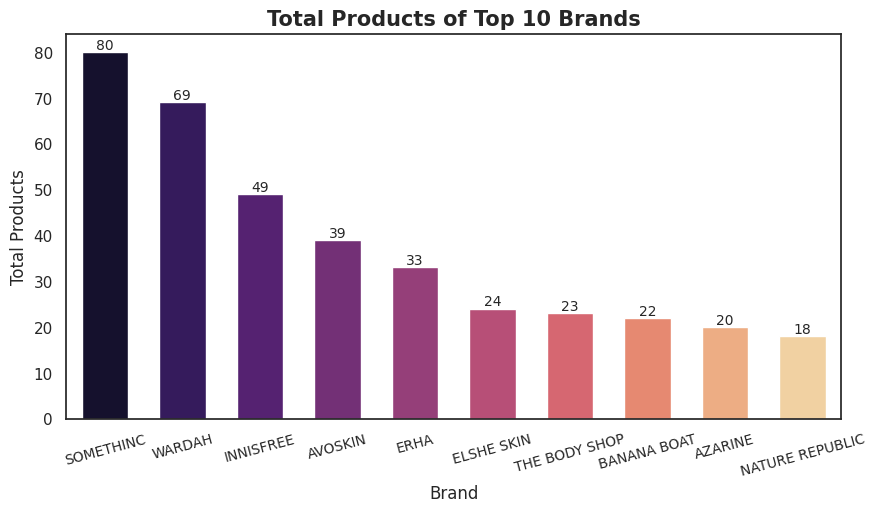

In [6]:
# Brand

plt.figure(figsize=(10, 5))
sns.set(style='white')
ax = sns.barplot(x='Brand', y='Counts', width = 0.6, data=top_10_brands, palette='magma')
ax.set_title('Total Products of Top 10 Brands', fontsize=15, fontweight='bold')
ax.set_xlabel('Brand', fontsize=12, fontweight='medium')
ax.set_ylabel('Total Products', fontsize=12, fontweight='medium')

for label in ax.containers:
    ax.bar_label(label, fontweight='medium', fontsize=10)
plt.xticks(rotation = 15, fontsize=10)
plt.show()

In [7]:
# Checking product type

pd_type = pd.DataFrame()
pd_type["Count"] = skincare["product_type"].value_counts()
pd_type["Count%"] = skincare["product_type"].value_counts()/skincare.shape[0]*100
pd_type

,Count,Count%
product_type,,
Serum,307,25.081699
Toner,255,20.833333
Moisturizer,248,20.261438
Sunscreen,212,17.320261
Face Wash,202,16.503268


In [12]:
fig = px.pie(pd_type, values = 'Count', color = pd_type.index, names = pd_type.index,
             color_discrete_sequence = ['#003049','#D62828', '#F77F00', '#FCBF49', '#E9D8A6'], hole = 0.5)
fig.update_traces(textposition = 'outside', textfont = dict(color = 'dark blue', size = 15), textinfo = 'label+percent', pull = [0.2,0,0,0], rotation = 10)
fig.add_annotation (text = 'Product Type', showarrow = False, font = dict(size = 12, color='dark blue'))
fig.update_layout(title={'text':'Skin Care Product Type', 'y':0.95, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'})
fig.show()

In [13]:
# Skin Type That Suitable For the Product
counts = skincare['skintype'].value_counts()
count_percentage = skincare['skintype'].value_counts(1)*100
counts_df = pd.DataFrame({'Skin_type':counts.index,'Counts':counts.values,'Percent%':np.round(count_percentage.values,2)})
counts_df

,Skin_type,Counts,Percent%
0,Oily,310,25.33
1,"Normal, Dry, Oily, Combination, Sensitive",263,21.49
2,Dry,167,13.64
3,"Normal, Dry",93,7.60
4,"Normal, Dry, Oily, Combination",68,5.56
5,Sensitive,55,4.49
6,"Normal, Dry, Oily, Sensitive",52,4.25
7,"Oily, Combination, Sensitive",43,3.51
8,"Dry, Oily, Sensitive",36,2.94
9,"Dry, Sensitive",27,2.21


In [14]:
# Skin Type
top_7 = counts_df.head(7)
sns.set(style='white')
fig = px.bar(data_frame=top_7, x='Skin_type', y='Counts',
       color='Counts', color_continuous_scale='Inferno_r',
       width=800, height=600,
       text_auto=True, title=f'Count of Skin Type That Suitable For The Product')
fig.update_layout(plot_bgcolor='#FFFCF2', xaxis_tickangle = 15)
fig.show()

In [10]:
# Creating numerical labels of notable_effects due to many effects shown by the diagram above
skincare['notable_effects']=skincare['notable_effects'].astype('category')
skincare['labels']=skincare['notable_effects'].cat.codes
skincare.head()

,product_href,product_name,product_type,brand,notable_effects,skintype,price,description,picture_src,labels
0,https://www.beautyhaul.com/product/detail/bubb...,ACWELL Bubble Free PH Balancing Cleanser,Face Wash,ACWELL,"Acne-Free, Pore-Care, Brightening, Anti-Aging",Oily,Rp 209.000,Mengangkat kotoran dan menghapus makeup dalam ...,https://www.beautyhaul.com/assets/uploads/prod...,18
1,https://www.sociolla.com/face-wash/62452-ph-ba...,ACWELL pH Balancing Soothing Cleansing Foam,Face Wash,ACWELL,"Soothing, Balancing","Normal, Dry, Combination",Rp 181.800,Membersihkan dan menenangkan kulit sensitif de...,https://images.soco.id/8f08ced0-344d-41f4-a15e...,127
2,https://www.sociolla.com/toner/15871-licorice-...,Acwell Licorice pH Balancing Cleansing Toner,Toner,ACWELL,"Soothing, Balancing","Normal, Dry, Oily, Combination, Sensitive",Rp 149.000,"Mengangkat sisa kotoran, debu, dan make up sek...","https://www.soco.id/cdn-cgi/image/w=73,format=...",127
3,https://www.beautyhaul.com/product/detail/aqua...,ACWELL Aquaseal Soothing Tonic,Toner,ACWELL,"Acne-Free, Pore-Care, Brightening, Anti-Aging",Oily,Rp 290.000,Pre-essence yang diformulasikan dengan ekstrak...,https://www.beautyhaul.com/assets/uploads/prod...,18
4,https://www.sociolla.com/essence/38023-licoric...,Licorice pH Balancing Essence Mist,Toner,ACWELL,"Brightening, Soothing","Normal, Dry",Rp 194.650,Essens mist dengan kelembapan tinggi yang memb...,"https://www.sociolla.com/cdn-cgi/image/w=425,f...",40


In [16]:
# Skin Type That Suitable For the Product
counts_effect = skincare['notable_effects'].value_counts()
count_percentage = skincare['notable_effects'].value_counts(1)*100
counts_effect_df = pd.DataFrame({'Notable_Effects':counts_effect.index,'Counts':counts_effect.values,'Percent%':np.round(count_percentage.values,2)})
counts_effect_df.head(10)

,Notable_Effects,Counts,Percent%
0,"Pore-Care, Brightening, Anti-Aging",150,12.25
1,Anti-Aging,105,8.58
2,"Acne-Free, Oil-Control, Pore-Care",86,7.03
3,"Moisturizing, Brightening, Black-Spot",71,5.80
4,"Hydrating, Moisturizing",70,5.72
5,"Acne-Free, Pore-Care, Brightening, Anti-Aging",64,5.23
6,"Brightening, Anti-Aging",57,4.66
7,"Hydrating, Soothing",53,4.33
8,"Soothing, Balancing",44,3.59
9,UV-Protection,43,3.51


In [18]:
top_5 = counts_effect_df.head(5)
fig = px.pie(top_5, values = 'Counts', color = 'Notable_Effects', names = 'Notable_Effects',
             color_discrete_sequence = ['#99582A','#F4ACB7', '#FFCCD5', '#FDFCDC', '#C6AC8F'])
fig.update_traces(textposition = 'inside', textfont = dict(color = 'black', size = 15), textinfo = 'percent')
fig.update_layout(title={'text':'Skin Care Product Notable Effects', 'y':0.95, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'})
fig.show()

In [17]:
# Skin Type That Suitable For the Product
counts_effect = skincare['notable_effects'].value_counts()
count_percentage = skincare['notable_effects'].value_counts(1)*100
counts_effect_df = pd.DataFrame({'Notable_Effects':counts_effect.index,'Counts':counts_effect.values,'Percent%':np.round(count_percentage.values,2)})
#counts_effect_df.head(10) # This line is not needed here, as you are using it in the next line

top_5 = counts_effect_df.head(5)
fig = px.pie(top_5, values = 'Counts', color = 'Notable_Effects', names = 'Notable_Effects',
             color_discrete_sequence = ['#99582A','#F4ACB7', '#FFCCD5', '#FDFCDC', '#C6AC8F'])
fig.update_traces(textposition = 'inside', textfont = dict(color = 'black', size = 15), textinfo = 'percent')
fig.update_layout(title={'text':'Skin Care Product Notable Effects', 'y':0.95, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'})
fig.show()

# Data Cleaning

In [20]:
# Remove duplicated rows (14 in total)
skincare.drop_duplicates(inplace=True)

# Re-checking the existence of duplicated rows
skincare.duplicated().sum()

0

# Data Preparation

**Encoding Each Skintypes**

In [21]:
# Separate all skintype into one list, considering comma + space as separators
skintype = skincare['skintype'].str.split(', ').tolist()

# Flatten the list
flat_skintype = [item for sublist in skintype for item in sublist]

# Convert to a set to make unique
set_skintype = set(flat_skintype)

# Back to list
unique_skintype = list(set_skintype)

# Create columns by each unique skintype
skincare = skincare.reindex(skincare.columns.tolist() + unique_skintype, axis=1, fill_value=0)

# For each value inside column, update the dummy
for index, row in skincare.iterrows():
    for val in row.skintype.split(', '):
        if val != 'NA':
            skincare.loc[index, val] = 1

In [22]:
skincare.head(5)

,product_href,product_name,product_type,brand,notable_effects,skintype,price,description,picture_src,labels,Oily,Normal,Sensitive,Dry,Combination
0,https://www.beautyhaul.com/product/detail/bubb...,ACWELL Bubble Free PH Balancing Cleanser,Face Wash,ACWELL,"Acne-Free, Pore-Care, Brightening, Anti-Aging",Oily,Rp 209.000,Mengangkat kotoran dan menghapus makeup dalam ...,https://www.beautyhaul.com/assets/uploads/prod...,18,1,0,0,0,0
1,https://www.sociolla.com/face-wash/62452-ph-ba...,ACWELL pH Balancing Soothing Cleansing Foam,Face Wash,ACWELL,"Soothing, Balancing","Normal, Dry, Combination",Rp 181.800,Membersihkan dan menenangkan kulit sensitif de...,https://images.soco.id/8f08ced0-344d-41f4-a15e...,127,0,1,0,1,1
2,https://www.sociolla.com/toner/15871-licorice-...,Acwell Licorice pH Balancing Cleansing Toner,Toner,ACWELL,"Soothing, Balancing","Normal, Dry, Oily, Combination, Sensitive",Rp 149.000,"Mengangkat sisa kotoran, debu, dan make up sek...","https://www.soco.id/cdn-cgi/image/w=73,format=...",127,1,1,1,1,1
3,https://www.beautyhaul.com/product/detail/aqua...,ACWELL Aquaseal Soothing Tonic,Toner,ACWELL,"Acne-Free, Pore-Care, Brightening, Anti-Aging",Oily,Rp 290.000,Pre-essence yang diformulasikan dengan ekstrak...,https://www.beautyhaul.com/assets/uploads/prod...,18,1,0,0,0,0
4,https://www.sociolla.com/essence/38023-licoric...,Licorice pH Balancing Essence Mist,Toner,ACWELL,"Brightening, Soothing","Normal, Dry",Rp 194.650,Essens mist dengan kelembapan tinggi yang memb...,"https://www.sociolla.com/cdn-cgi/image/w=425,f...",40,0,1,0,1,0


## Exporting the DataFrame as a CSV file

The next stage is to extract the cleaned and prepared dataset into .csv format, to enter the modeling and deployment stage in the home.py file

In [23]:
skincare.to_csv("export_skincare.csv")

# Modelling

### TF-IDF Vectorizer

The TF-IDF Vectorizer will be used in the recommendation system to find a representation of the important features of each notable_effects category. We will use the tfidfvectorizer() function from the sklearn library.

In [28]:
# Modeling with Content Based Filtering
# Initializing TfidfVectorizer
tf = TfidfVectorizer()

# Perform IDF calculation on 'notable_efects' data
tf.fit(skincare['notable_effects'])

# Mapping array from integer index feature to name feature
tf.get_feature_names_out()

array(['acne', 'aging', 'anti', 'balancing', 'barrier', 'black',
       'brightening', 'care', 'control', 'free', 'hydrating',
       'moisturizing', 'no', 'oil', 'pore', 'protection', 'refreshing',
       'skin', 'soothing', 'spot', 'uv', 'whitecast'], dtype=object)

In [29]:
# Doing fit then transformed to matrix form
tfidf_matrix = tf.fit_transform(skincare['notable_effects'])

# Viewing matrix size TF IDF
shape = tfidf_matrix.shape
shape

(1210, 22)

In [30]:
# Convert TF-IDF vector in matrix form with todense() function
tfidf_matrix.todense()

matrix([[0.44938623, 0.32725364, 0.32725364, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.41603571, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.42409154, 0.42409154, ..., 0.        , 0.        ,
         0.        ]])

In [31]:
# Making dataframe to see TF-IDF matrix

pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=skincare.product_name
).sample(shape[1], axis=1).sample(10, axis=0)

,black,soothing,anti,no,oil,care,refreshing,balancing,whitecast,moisturizing,...,protection,aging,spot,uv,barrier,control,skin,brightening,pore,acne
product_name,,,,,,,,,,,,,,,,,,,,,
LOREAL PARIS Revitalift Hyaluronic Acid Serum 30ml,0.0,0.000000,0.707107,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.707107,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
SOMETHIN CLEVEL 1% Retinol,0.0,0.000000,0.327254,0.0,0.0,0.372524,0.0,0.000000,0.0,0.0,...,0.000000,0.327254,0.0,0.000000,0.000000,0.0,0.000000,0.322054,0.372524,0.449386
PURITO Pure Hyaluronic Acid 90 Serum,0.0,0.000000,0.424092,0.0,0.0,0.482757,0.0,0.000000,0.0,0.0,...,0.000000,0.424092,0.0,0.000000,0.000000,0.0,0.000000,0.417353,0.482757,0.000000
Wardah Acnederm Acne Care Serum,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.594899,0.0,0.594899,0.000000,0.000000,0.381918
BIODERMA Photoderm Max fluide SPF100 40ml,0.0,0.000000,0.397345,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.584907,0.397345,0.0,0.584907,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
Harlette Waterymelon Deep Hydration Toner,0.0,0.691269,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
Erha Perfect Shield Helios 30g - Daily Sunscreen,0.0,0.000000,0.397345,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.584907,0.397345,0.0,0.584907,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
SKIN AQUA Tone Up UV Essence Mint Green,0.0,0.000000,0.370059,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.544741,0.370059,0.0,0.544741,0.000000,0.0,0.000000,0.364179,0.000000,0.000000
NACIFIC Pink AHA BHA Serum 50ml Rp 390.000,0.0,0.000000,0.424092,0.0,0.0,0.482757,0.0,0.000000,0.0,0.0,...,0.000000,0.424092,0.0,0.000000,0.000000,0.0,0.000000,0.417353,0.482757,0.000000


### Cosine Similarity

In [32]:
# Calculating Cosine Similarity on the TF-IDF matrix
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.        , 0.        , ..., 0.37452125, 0.        ,
        0.77165804],
       [0.        , 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.37452125, 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.77165804, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [33]:
# Creating a dataframe from the cosine_similarity variable with rows and columns in the form of product names
cosine_sim_df = pd.DataFrame(cosine_sim, index=skincare['product_name'], columns=skincare['product_name'])

# See the similarity matrix for each product
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

product_name,Himalaya Moisturizing Aloe Vera Face Wash 100ml,Wardah Aloe Hydramild Moisturizer Cream,SAFI Dermasafe Gentle Car Mousse Cleanser 150ml,NACIFIC Pink AHA BHA Serum 50ml Rp 390.000,Ariul 7 Days Floral Mist
product_name,,,,,
SOMETHINC Hylapore Away Solution,0.000000,0.000000,0.000000,0.599756,0.000000
ELSHE SKIN Radiant Supple Serum,0.000000,0.000000,0.000000,0.119542,0.000000
Erha Acneact Witch Hazel Acne Blemish Toner,0.244582,0.735603,0.190779,0.000000,0.000000
PIXY White Aqua Brightening Moisturizer,0.000000,0.000000,0.000000,0.465869,0.000000
Garnier Garnier Sakura White Pinkish Radiance Essence Lotion,0.593388,0.560327,0.000000,0.000000,0.266468
ELSHE SKIN Soothing Skin Toner 100mL,0.000000,0.000000,0.000000,0.484699,0.000000
The Body Shop Lemon Purifying Face Wash,0.927154,0.358615,0.595601,0.000000,0.787065
SENKA Perfect Whip Vibrant White Facial Foam 100g,0.150412,0.000000,0.000000,0.132772,0.169412
A'pieu Deep Clean Cleansing Tissue,0.316448,0.496952,0.000000,0.495634,0.000000


### Getting Recommendation

In [34]:
def skincare_recommendations(nama, similarity_data=cosine_sim_df, items=skincare[['product_name', 'notable_effects']], k=5):

    # Retrieve data by using argpartition to partition indirectly along a given axis
    # Dataframe converted to be numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,nama].to_numpy().argpartition(
        range(-1, -k, -1))

    # Retrieve data with the greatest similarity from the existing index
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Drop a name so that the name of the product we are looking for doesnt' appear in the list of recommendations
    closest = closest.drop(nama, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

In [35]:
skincare[skincare.product_name.eq('ELSHE SKIN Radiant Supple Serum')].head()

,product_href,product_name,product_type,brand,notable_effects,skintype,price,description,picture_src,labels,Oily,Normal,Sensitive,Dry,Combination
292,https://www.beautyhaul.com/product/detail/radi...,ELSHE SKIN Radiant Supple Serum,Serum,ELSHE SKIN,"Acne-Free, Brightening, Black-Spot","Normal, Dry, Oily, Combination, Sensitive",Rp 182.750,ElsheSkin Radiant Supple Serum atau Radiant Sk...,https://www.beautyhaul.com/assets/uploads/prod...,3,1,1,1,1,1


Trying to test the model by getting recommendation

In [36]:
 # Getting skin care product recommendation which similar to Wardah Renew You Anti Aging Day Cream
skincare_recommendations("ELSHE SKIN Radiant Supple Serum")

,product_name,notable_effects
0,SOMETHINC Dark Spot Reducer Ampoule,"Acne-Free, Brightening, Black-Spot"
1,AVOSKIN YOUR SKIN BAE SERIES Niacinamide 12% +...,"Hydrating, Acne-Free, Brightening, Black-Spot"
2,Mineral Botanica Perfect Purifying Acne Night ...,"Moisturizing, Acne-Free, Black-Spot"
3,PURIVERA BOTANICALS Sugar Willow Serum - Fruit...,"Acne-Free, Pore-Care, Black-Spot"
4,BREYLEE Step 2 Pore Minimizer Serum - Pengecil...,"Acne-Free, Pore-Care, Black-Spot"
